# Regression

Regression analysis is a statistical method used to examine the relationship between a dependent variable (the outcome you're interested in predicting) and one or more independent variables (factors you think might influence that outcome). It serves two main purposes:

1. **Prediction**: Estimating the value of the dependent variable based on the known values of the independent variables.
2. **Inference**: Understanding how the dependent variable changes in response to changes in the independent variables, which helps in identifying key predictors and their relative importance.

The main aim of regression is to model this relationship through equations, with linear regression being the simplest form where the relationship is assumed to be a straight line. Other types, like logistic or polynomial regression, cater to more complex relationships.

Key components include the **dependent variable** (what you're predicting), **independent variables** (what you're using for prediction), **regression coefficients** (which quantify the relationship between dependent and independent variables), and the **intercept** (the baseline value of the dependent variable when all independents are zero).

## Diabetes Example

For this example we're picking a diabetes set where we have various measurements such as `age`, `sex`, `bmi`, and others. From these values we will try to predict the target `diabetes`.

### Loading the Data

In [18]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes(as_frame=True)
df = diabetes.data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Selecting Columns

For this example we are going to use only one column as an independnt variable, so that we're able to display it in a 2D graph later on. Instead of picking a column randomly, let's pick one that has a high correlation with the target.

In [16]:
df.corrwith(diabetes.target)

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

It looks like `bmi` has the highest correlation of `0.58`, so our `X` will be `bmi` and `y` will be the target.

In [20]:
X = df['bmi']
y = diabetes.target

### Dataset Split

When you apply machine learning algorithms to data, we split the data into *training*, and *test*. Training is used to train the machine learning model and usually there are more observations in this set, whilst test is used to observe how accurate the model is, this dataset is usually smaller and not seen during training.

For this example we will use a ready-made function `train_test_split` from `sklearn.model_selection`.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

So in this case we have `X_train` that will be used for training, and the outcome (target) for this set is `y_train`. This is made up of 80% of our original dataset. The remaining 20% are placed in `X_test` and `y_test`, which will be used for evaluation.

### Perform Linear Regression

Now, let's implement linear regression. The goal is to find the line that best fits the data. The line equation is $y = mx + b$, where $m$ is the slope and $b$ is the y-intercept. We will use the least squares method to find the best-fitting line.

In [37]:
# Add a column of ones to X_train for the intercept
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculate the best fit line parameters using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# The parameters are stored in theta_best, where the first element is the intercept and the second is the slope
theta_best

array([152.00335421, 998.57768914])

### Making Predictions

With the model parameters (theta_best), we can make predictions on new data. To do this, we prepare the test data in the same way we did with the training data and then use our model to make predictions.

In [38]:
# Prepare the test data
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Make predictions on the test set
y_pred = X_test_b.dot(theta_best)

### Evaluating the Model

To evaluate the model, we can compute the root mean squared error (RMSE) on the test set.

In [42]:
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 63.73245584860925


### Visualising the Result

Finally, it's helpful to visualize the model's predictions alongside the actual data points.

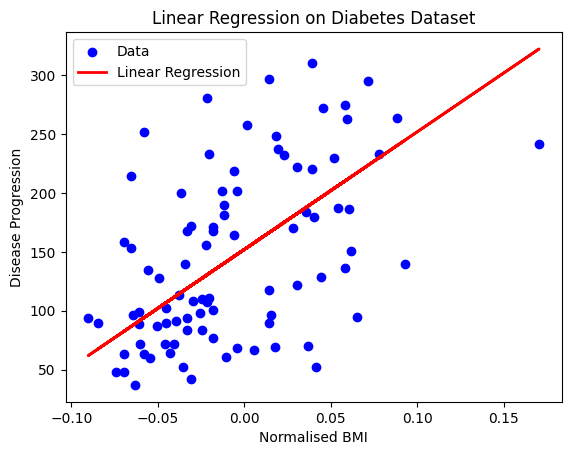

In [48]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Normalised BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression on Diabetes Dataset')
plt.legend()

plt.show()
